<h2 align="center">Лабораторна робота №1</h2>
<h5 align="center"><i>Роботу виконала студентка групи ФІ-21, Денисенко Анастасія</i></h5>
<p><b>Тема роботи:</b> "Популяційні алгоритми. Розроблення програмного забезпечення знаходження глобальних екстремумів багатовимірних функцій".</p>
<p><b>Мета роботи:</b> опанувати принципи роботи генетичних алгоритмів, алгоритму оптимізації сірими вовками, розробити власне відповідне програмне забезпечення знаходження глобальних екстремумів у задачах багатовимірної онокритеріальної оптимізації.</p>

### Завдання до лабораторної роботи:

1. Ознайомитися з теоретичними відомостями до кожного з розглянутих методів й алгоритмів (генетичний алгоритм оптимізації та алгоритм оптимізації зграєю сірих вовків).
2. Для генетичного алгоритму всі процеси (схрещування, мутацію та відбір) розглядати лише у двійковому коді. Як варіант, двійковий код (код хромосоми) можна перевести у дійсне число з проміжку $x\in[a; b]$ за формулою: $x = \frac{\text{Dec}(\text{code})}{2^w - 1} \cdot (b-a) + a$, де $w$ - кількість бітів кожної хромосоми (задається у програмі), $\text{Dec}(\text{code})$ - функція переведення двійкового коду (змінна $\text{code}$) хромосоми в десяткове число.
3. Розробити програмне забезпечення (мова програмування і середовище розробки за вибором студента) для тестування описаних вище алгоритмів (генетичний алгоритм та алгоритм зграї сірих вовків) на одновимірній тестовій одноекстремальній функції.
4. Модифікувати програми так, щоб можна було бачити процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації.
5. Модифікувати програми на випадок пошуку глобального екстремуму двовимірної (багатовимірної) функції. Також показати процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації. Показати зміну положення популяції на контурному графіку для двовимірних функцій.
6. Для багатовимірних одноекстремальних функцій (на прикладі функції Растринга при $n\geq 3$) показати лише графік пристосованості популяції (за критерієм значення функції кожного елемента популяції), а також показати графік відстані від кращого елемента популяції (значення функції) до відомого оптимального значення функції, яке вказане. Тобто останньому в графіку по осі абсцис відкладається номер ітерації, а по осі ординат - найменше значення відстані між оптимальним значенням функції і кращим.
7. Обрати будь-яку іншу з функцій, що не наведені у даній лабораторній роботі, знайти її глобальний екстремум, продемонструвати відповідні результати.
8. Зробити висновки до отриманих результатів.
9. Зробити звіт у PDF-форматі з результатами виконання лабораторної роботи і завантажити його до Classroom.
10. Захистити лабораторну роботу у викладача.

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib
from wolves import *
from genetic import *
from functions import *

## Оптимізація зграєю вовків:

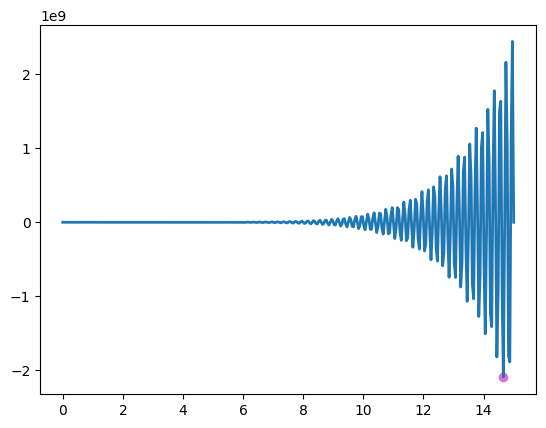

In [6]:
w = Wolves_optimization(f, 60, 60, 0.1, 0, 15, minimize = True)
w.plot()

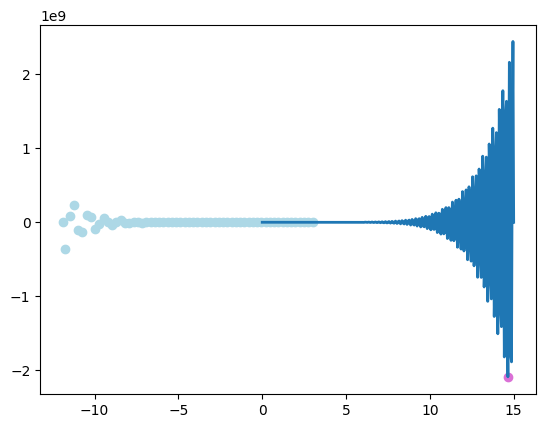

In [8]:
w.plot_dynamic()

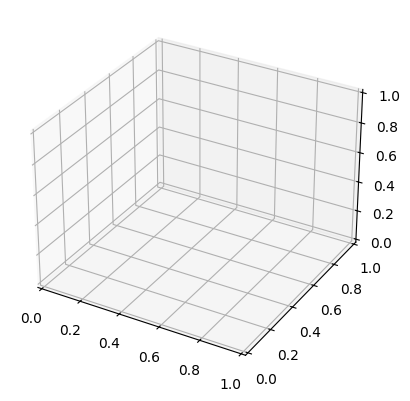

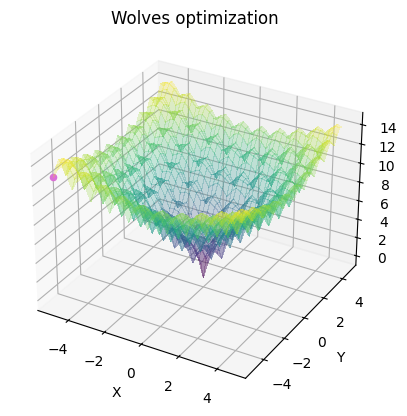

/Users/anastasiiadenysenko/miniforge3/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [14]:
w1 = Wolves_optimization_x_y(erkli, 60, 20, 0.1, -5, 5, 0.1, -5, 5, minimize = False)
w1.plot_dynamic()

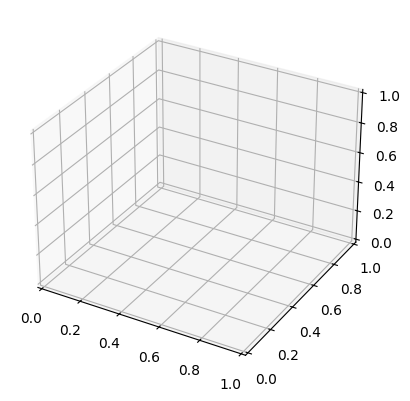

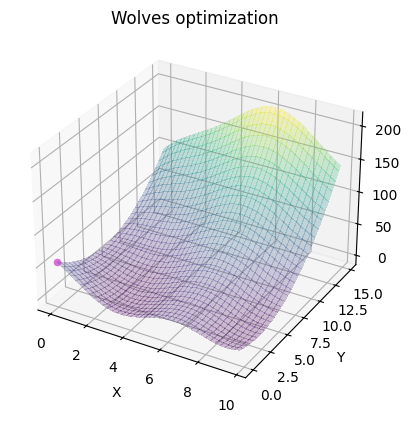

In [15]:
w2 = Wolves_optimization_x_y(branin, 60, 20, 0.1, 0, 10, 0.1, 0, 15, minimize = True)
w2.plot_dynamic()

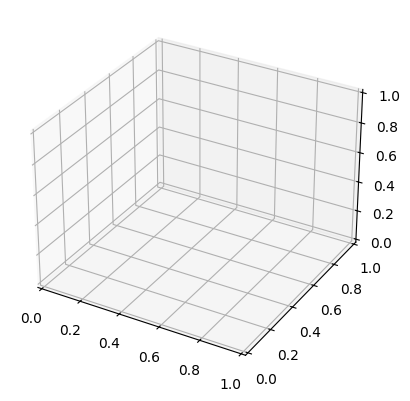

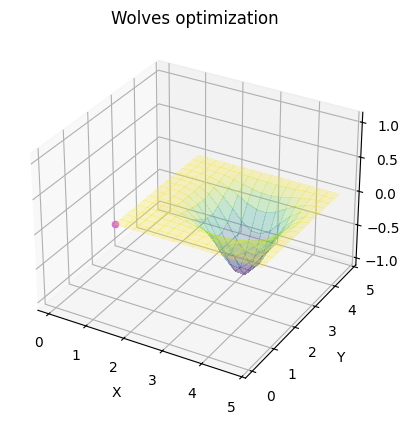

In [16]:
w3 = Wolves_optimization_x_y(easom, 60, 20, 0.1, 1, 5, 0.1, 1, 5, minimize = False)
w3.plot_dynamic()

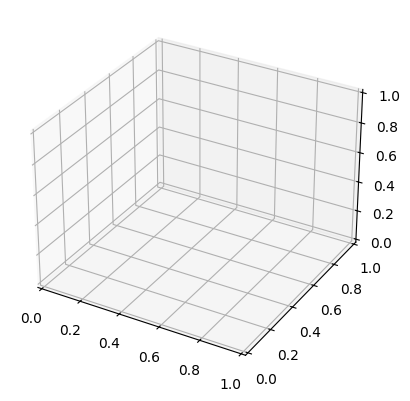

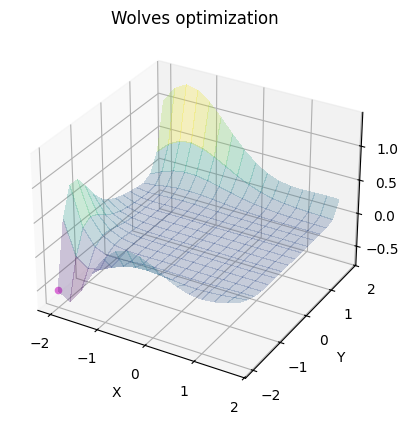

In [17]:
w4 = Wolves_optimization_x_y(goldstein_price, 60, 20, 0.1, -2, 2, 0.1, -2, 2, minimize = True)
w4.plot_dynamic()

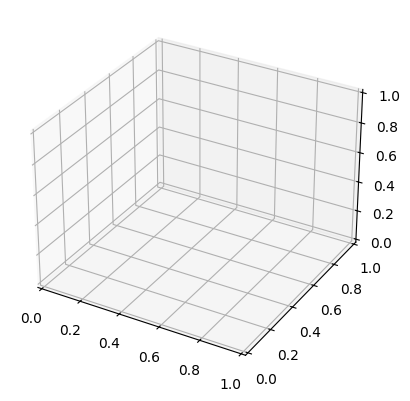

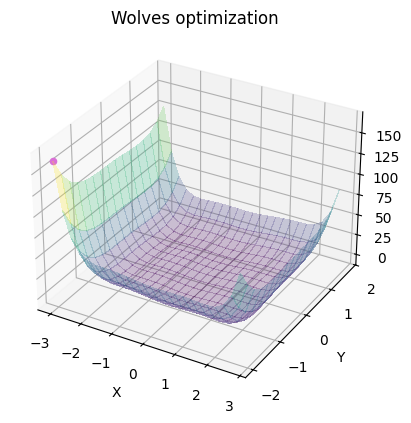

In [20]:
w5 = Wolves_optimization_x_y(six_hump_camel, 60, 20, 0.1, -3, 3, 0.1, -2, 2, minimize = True)
w5.plot_dynamic()

## Оптимізація генетичним алгоритмом:

In [2]:
g = Genetic_optimization_for_x(f, 40, 5, 0, 15, 8, 0.3, 40, minimize = True)

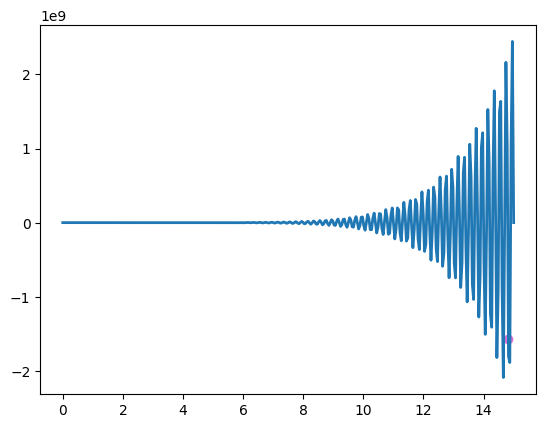

In [3]:
g.plot()

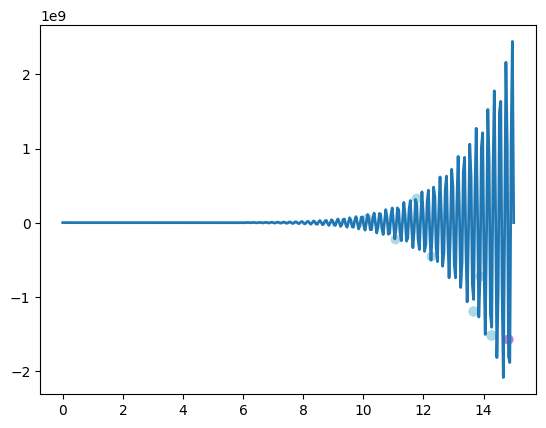

In [4]:
g.plot_dynamic()

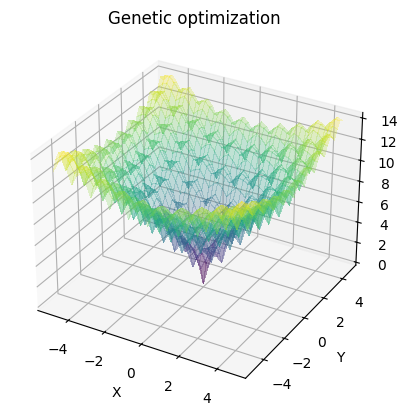

/Users/anastasiiadenysenko/miniforge3/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [5]:
g0 = Genetic_optimization_for_x_and_y(erkli, 40, 7, -5, 5, -5, 5, 8, 0.01, minimize = True)
g0.plot_dynamic()

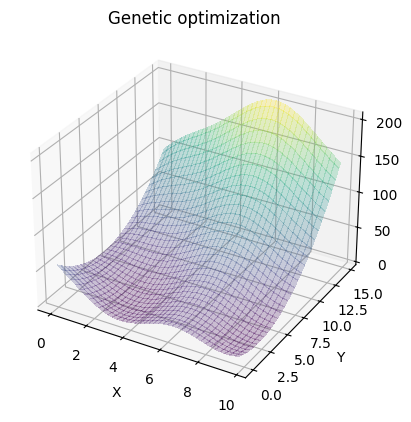

In [6]:
g1 = Genetic_optimization_for_x_and_y(branin, 60, 7, 0, 10, 0, 15, 8, 0.01, minimize = False)
g1.plot_dynamic()

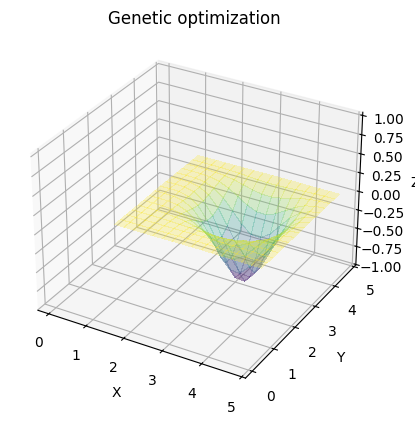

In [7]:
g2 = Genetic_optimization_for_x_and_y(easom, 40, 7, 1, 5, 1, 5, 8, 0.01, minimize = True)
g2.plot_dynamic()

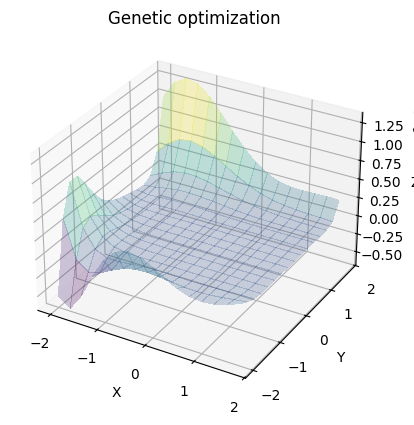

In [8]:
g3 = Genetic_optimization_for_x_and_y(goldstein_price, 50, 7, -2, 2, -2, 2, 8, 0.1, minimize = False)
g3.plot_dynamic()

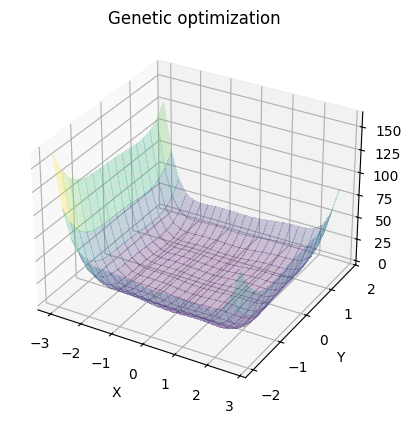

In [9]:
g4 = Genetic_optimization_for_x_and_y(six_hump_camel, 60, 5, -3, 3, -2, 2, 8, 0.1, minimize = True)
g4.plot_dynamic()